In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = 16,9
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['text.color'] = 'k'

In [2]:
# Read data
df1 = pd.read_csv('reddit.csv', skip_blank_lines='True')
df1 = df1.rename(columns={'clean_comment':'comment'})
df1['category'] = df1['category'].map({-1: 0.0, 0: 1.0, 1:2.0})
df1.index = range(len(df1))

In [3]:
# Read data
df2 = pd.read_csv('covid.csv', skip_blank_lines='True')
df2 = df2[['sentiment', 'text']]
df2 = df2.rename(columns={'text':'comment', 'sentiment':'category'})
df2['category'] = df2['category'].map({'sad': 0.0, 'joy': 2.0, 'fear':0.0, 'anger':0.0})
df2.index = range(len(df2))

In [4]:
# Read data
df3 = pd.read_csv('apple.csv', skip_blank_lines='True')
df3 = df3.rename(columns={'text':'comment', 'sentiment':'category'})
df3['category'] = df3['category'].map({-1: 0.0, 0: 0.0, 1:2.0})
df3.index = range(len(df3))

In [5]:
# merge all into one dataframe
df = pd.concat([df1,df2,df3], ignore_index=True)
df.sample(10)

,comment,category
14819,with the new space council wonder trump wants ...,2.0
34267,vinash kale vipreet buddhi,1.0
34463,two things the government withheld the report...,0.0
22315,they don care about indian politics general bu...,2.0
9244,have clue about others but our business fucked,0.0
31921,all working for without vpn but why reddit,1.0
28527,desperately need indian jon stewart colbert r...,0.0
19929,the whole episode has been blown out proportio...,0.0
37253,uk records lowest daily virus death toll since...,0.0
21859,belong liberal family don want through demonet...,2.0


In [6]:
# check null and duplicates
print('- Total number of missing values: \n', df.isnull().sum())
print('- Total number of duplicates: {}'.format(df.duplicated().sum()))

- Total number of missing values: 
 comment     100
category      0
dtype: int64
- Total number of duplicates: 500


In [7]:
# Remove null and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

<Axes: xlabel='category'>

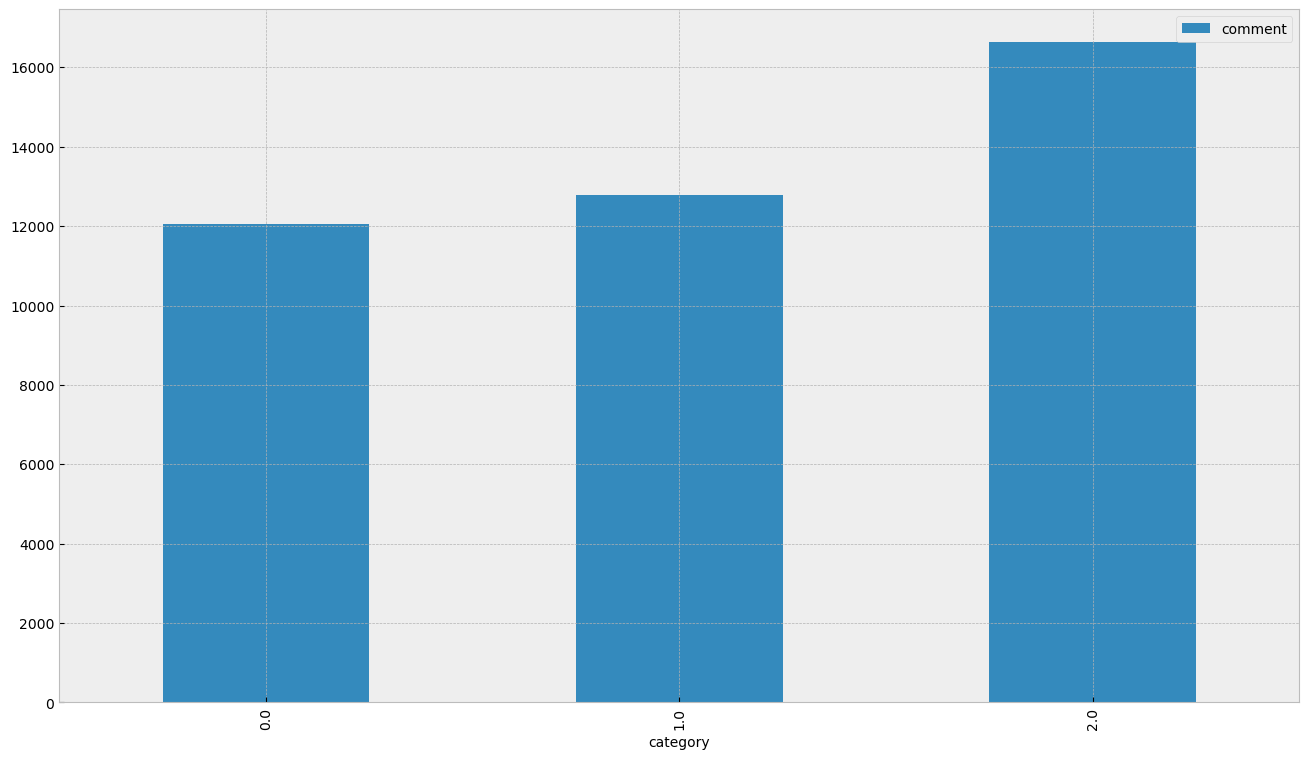

In [8]:
# Plot sentiments 0:negative, 1: neutral, 2:positive
df.groupby('category').count().plot(kind='bar')

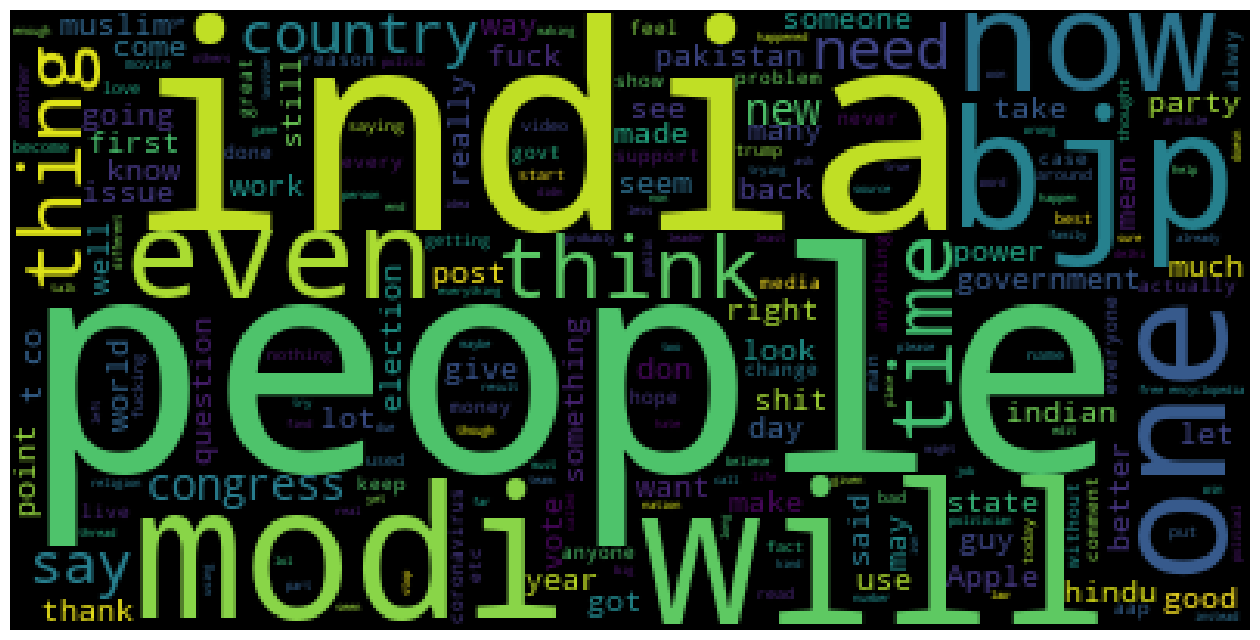

In [9]:
# plotting a wordcloud for fun
text = " ".join(i for i in df['comment'])
wc = WordCloud().generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [10]:
# Reset index 
df.index = range(len(df))

In [11]:
# Creating a corpus of cleaned data after processing using nltk 
corpus = []
for i in range(len(df)):
    review = df['comment'][i]
    review = review.lower()
    review = re.sub(r'[^a-z0-9]', ' ', review)
    review = word_tokenize(review)

    lemma = WordNetLemmatizer()
    stops = set(stopwords.words('english'))
    stops.remove('not')

    review = [lemma.lemmatize(word) for word in review if word not in stops]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
# independent and dependent labels
X = corpus
y = df.category.values

In [13]:
# creating a document matrix (text to numbers)
cv = CountVectorizer(max_features= 2000 ,ngram_range=(1,3))

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# fitting our data
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33174, 2000), (8294, 2000), (33174,), (8294,))

In [16]:
# model 1 Logisticregression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[1744  235  389]
 [  73 2447   91]
 [ 341  286 2688]]


0.8293947431878467

In [17]:
# model 2 naive bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[1681  483  204]
 [ 146 2437   28]
 [1770  739  806]]


0.5936821798890765

In [ ]:
# model 3 xg boost (Takes a lot of time to compute)
# from xgboost import XGBClassifier
# classifier = XGBClassifier()
# classifier.fit(X_train, y_train)

# y_pred = classifier.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# accuracy_score(y_test, y_pred)